

**1.   Histogram Citra**


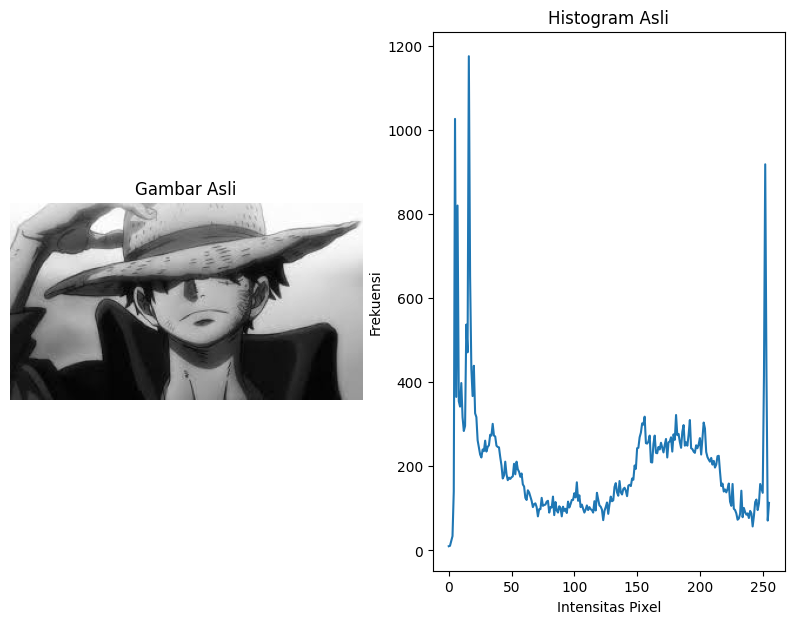

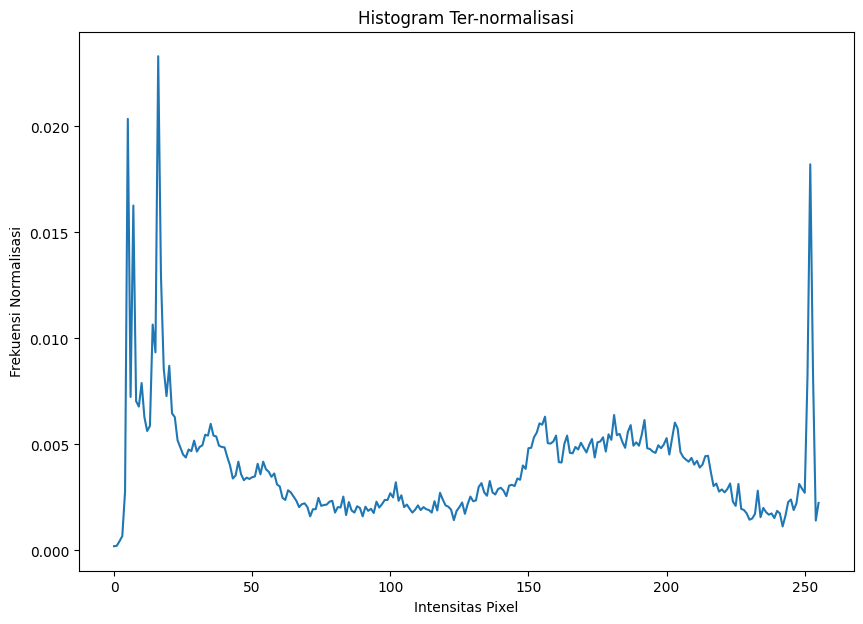

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar dalam format grayscale
image = cv2.imread('/content/lufffy.jpeg', cv2.IMREAD_GRAYSCALE)

# Menampilkan gambar asli
plt.figure(figsize=(10, 7))

# Gambar asli
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Gambar Asli')
plt.axis('off')

# Menghitung histogram citra
histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

# Menampilkan histogram asli
plt.subplot(1, 2, 2)
plt.plot(histogram)
plt.title('Histogram Asli')
plt.xlabel('Intensitas Pixel')
plt.ylabel('Frekuensi')

# Menormalisasi histogram
normalized_histogram = histogram / histogram.sum()

# Menampilkan histogram yang sudah dinormalisasi
plt.figure(figsize=(10, 7))
plt.plot(normalized_histogram)
plt.title('Histogram Ter-normalisasi')
plt.xlabel('Intensitas Pixel')
plt.ylabel('Frekuensi Normalisasi')

# Menampilkan gambar dan histogram
plt.show()



**2.   Operasi Konvolusi dengan Kernel Sederhana**



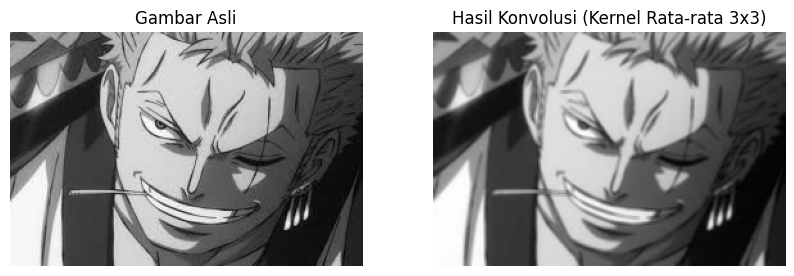

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar
image = cv2.imread('/content/zorro.jpeg')

# Mengonversi gambar menjadi grayscale
# Ini dilakukan agar kita bekerja dengan citra satu kanal (intensitas piksel),
# yang lebih sederhana untuk operasi konvolusi.
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Menyusun kernel rata-rata 3x3
# Kernel rata-rata adalah matriks 3x3 dengan nilai yang sama, yaitu 1/9 untuk setiap elemen.
# Tujuan kernel ini adalah untuk menghitung rata-rata piksel di sekitar tiap piksel pusatnya.
kernel = np.ones((3, 3), np.float32) / 9

# Melakukan operasi konvolusi menggunakan filter rata-rata 3x3
# Fungsi filter2D digunakan untuk menerapkan kernel ke gambar, menghasilkan gambar baru
# yang sudah melalui proses konvolusi.
convolved_image = cv2.filter2D(gray_image, -1, kernel)

# Menampilkan gambar asli dan hasil konvolusi
# Gambar pertama adalah gambar asli dalam format grayscale,
# sedangkan gambar kedua adalah hasil konvolusi dengan kernel rata-rata 3x3.
plt.figure(figsize=(10, 7))

# Gambar Asli
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Gambar Asli')
plt.axis('off')  # Menonaktifkan axis untuk tampilan yang lebih bersih

# Hasil Konvolusi
plt.subplot(1, 2, 2)
plt.imshow(convolved_image, cmap='gray')
plt.title('Hasil Konvolusi (Kernel Rata-rata 3x3)')
plt.axis('off')  # Menonaktifkan axis untuk tampilan yang lebih bersih

# Menampilkan hasilnya
plt.show()

# Penjelasan Efek Konvolusi:
# - Kernel rata-rata 3x3 menggantikan setiap piksel dengan rata-rata nilai piksel di sekitarnya.
# - Hasilnya adalah gambar yang terlihat lebih halus atau "kabur" karena kehilangan detail tajam.
# - Konvolusi ini efektif dalam mengurangi noise dengan meratakan intensitas piksel di sekitar objek.
# - Efek ini adalah jenis "blurring" atau penghalusan gambar.


**3. Transformasi Fourier**



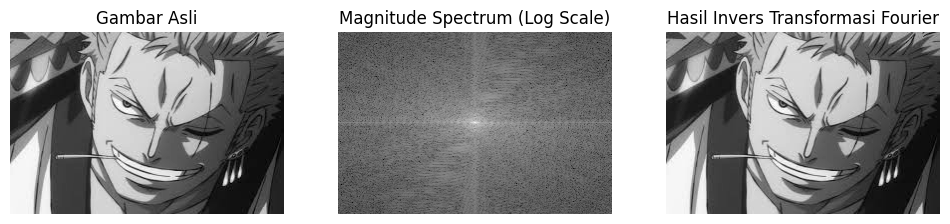

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar
image = cv2.imread('/content/zorro.jpeg', cv2.IMREAD_GRAYSCALE)

# Melakukan Transformasi Fourier pada gambar
# Transformasi Fourier digunakan untuk mengubah citra dari domain spasial ke domain frekuensi.
f = np.fft.fft2(image)  # Melakukan 2D Fourier Transform
fshift = np.fft.fftshift(f)  # Memindahkan frekuensi rendah ke tengah gambar

# Menghitung magnitude spectrum
# Magnitude spectrum menggambarkan kekuatan frekuensi pada gambar.
magnitude_spectrum = np.abs(fshift)

# Melakukan logaritma pada magnitude spectrum untuk memperjelas detail pada spektrum
magnitude_spectrum_log = np.log(magnitude_spectrum + 1)

# Melakukan invers transformasi Fourier
# Untuk mendapatkan kembali gambar asli setelah transformasi Fourier dan inversi
f_ishift = np.fft.ifftshift(fshift)  # Mengembalikan frekuensi ke posisi awal
img_back = np.fft.ifft2(f_ishift)  # Melakukan invers 2D Fourier Transform
img_back = np.abs(img_back)  # Mengambil nilai absolut dari hasil invers transformasi

# Menampilkan hasil
plt.figure(figsize=(12, 8))

# Gambar Asli
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Gambar Asli')
plt.axis('off')

# Magnitude Spectrum (Log Scale)
plt.subplot(1, 3, 2)
plt.imshow(magnitude_spectrum_log, cmap='gray')
plt.title('Magnitude Spectrum (Log Scale)')
plt.axis('off')

# Hasil Invers Transformasi Fourier
plt.subplot(1, 3, 3)
plt.imshow(img_back, cmap='gray')
plt.title('Hasil Invers Transformasi Fourier')
plt.axis('off')

# Menampilkan hasil
plt.show()

# Penjelasan Efek Transformasi Fourier:
# 1. **Magnitude Spectrum**:
#    - Magnitude spectrum menggambarkan seberapa besar kontribusi masing-masing frekuensi pada citra.
#    - Frekuensi rendah terletak di pusat spektrum dan berhubungan dengan informasi yang lebih halus, seperti latar belakang atau objek besar dalam citra.
#    - Frekuensi tinggi terletak di tepi spektrum dan berhubungan dengan detail tajam atau noise dalam citra.
#    - Logaritma diterapkan pada magnitude untuk memperjelas tampilan frekuensi rendah dan tinggi.
#
# 2. **Hasil Invers Transformasi Fourier**:
#    - Setelah melakukan transformasi Fourier dan memperoleh magnitude spectrum, kita dapat kembali ke domain spasial (gambar asli) dengan melakukan invers Fourier.
#    - Hasil invers ini harusnya sangat mirip dengan gambar asli jika tidak ada informasi yang hilang.


4. Operasi Aritmatika Citra

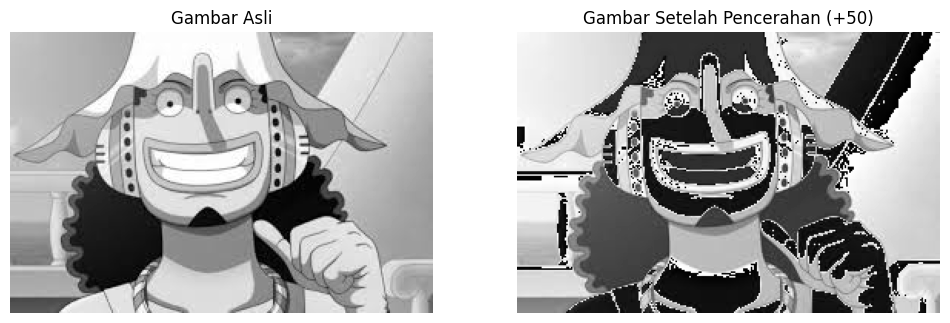

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar dalam format grayscale
image = cv2.imread('/content/usop.jpeg', cv2.IMREAD_GRAYSCALE)

# Fungsi untuk mencerahkan gambar
def brighten_image(image, constant):
    """
    Fungsi untuk mencerahkan gambar dengan menambahkan konstanta pada setiap piksel.
    Operasi clipping dilakukan untuk memastikan nilai piksel tidak melebihi 255.
    """
    # Menambahkan konstanta pada setiap piksel
    brightened_image = image + constant

    # Operasi clipping untuk memastikan nilai piksel tidak lebih dari 255
    brightened_image = np.clip(brightened_image, 0, 255)

    return brightened_image.astype(np.uint8)

# Menambahkan konstanta pencerahan
constant = 50  # Nilai konstanta untuk pencerahan
brightened_image = brighten_image(image, constant)

# Menampilkan gambar asli dan hasil pencerahan
plt.figure(figsize=(12, 8))

# Gambar Asli
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Gambar Asli')
plt.axis('off')  # Menonaktifkan axis

# Gambar Setelah Pencerahan
plt.subplot(1, 2, 2)
plt.imshow(brightened_image, cmap='gray')
plt.title(f'Gambar Setelah Pencerahan (+{constant})')
plt.axis('off')  # Menonaktifkan axis

# Menampilkan hasilnya
plt.show()

# Penjelasan Perubahan:
# 1. **Pencerahan Gambar**:
#    - Pencerahan dilakukan dengan menambahkan konstanta pada setiap piksel citra.
#    - Hal ini membuat semua piksel gambar lebih terang, karena intensitas piksel meningkat.
# 2. **Operasi Clipping**:
#    - Untuk memastikan tidak ada nilai piksel yang melebihi nilai maksimum (255) yang diizinkan pada citra grayscale, kita menggunakan operasi clipping dengan `np.clip`.
#    - Setiap piksel yang melebihi 255 akan dipotong (clipped) menjadi 255, sehingga gambar tetap berada dalam rentang yang sah.
# 3. **Efek Visual**:
#    - Citra yang lebih terang dengan menambahkan konstanta ke semua piksel.
#    - Gambar yang terang dapat lebih mudah dilihat dalam kondisi pencahayaan yang kurang atau untuk menonjolkan detail gambar yang lebih gelap.
